In [1]:
# Install required NLP and machine learning libraries used in this project
!pip -q install nltk gensim spacy scikit-learn seaborn
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Imports
# Data handling and numerical operations
import pandas as pd
import numpy as np

# Text preprocessing libraries for basic cleaning, stop words removal, tokenization, and lemmatization
import re
import nltk
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("punkt_tab")
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Text representation and feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy

# Machine learning models for text classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Evaluation metrics and visualization tools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Task 2 - Selection of an Appropriate Dataset

# Import dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_NLP/Mental-Health-Twitter.csv', encoding = 'ISO-8859-1')

In [5]:
# Obtain the first rows of the dataset
data.head(10)

,index,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,Itâs hard to say whether packing lists are m...,1013187241,84,211,251,837,1,1
5,5,637692793083817985,Sat Aug 29 18:26:24 +0000 2015,Making packing lists is my new hobby... #movin...,1013187241,84,211,251,837,1,1
6,6,637691649943072772,Sat Aug 29 18:21:51 +0000 2015,At what point does keeping stuff for nostalgic...,1013187241,84,211,251,837,1,1
7,7,637689418472652800,Sat Aug 29 18:12:59 +0000 2015,Currently in the finding-boxes-of-random-shit ...,1013187241,84,211,251,837,0,1
8,8,637687177946734592,Sat Aug 29 18:04:05 +0000 2015,"Can't be bothered to cook, take away on the wa...",1013187241,84,211,251,837,0,1
9,9,637684866906255360,Sat Aug 29 17:54:54 +0000 2015,RT @itventsnews: ITV releases promo video for ...,1013187241,84,211,251,837,41,1


In [6]:
# Display dataset shape
print("Dataset shape:", data.shape)

Dataset shape: (20000, 11)


In [7]:
# Display the attributes names
print("Attributes:", data.columns.tolist())

Attributes: ['index', 'post_id', 'post_created', 'post_text', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label']


In [8]:
# Summary information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


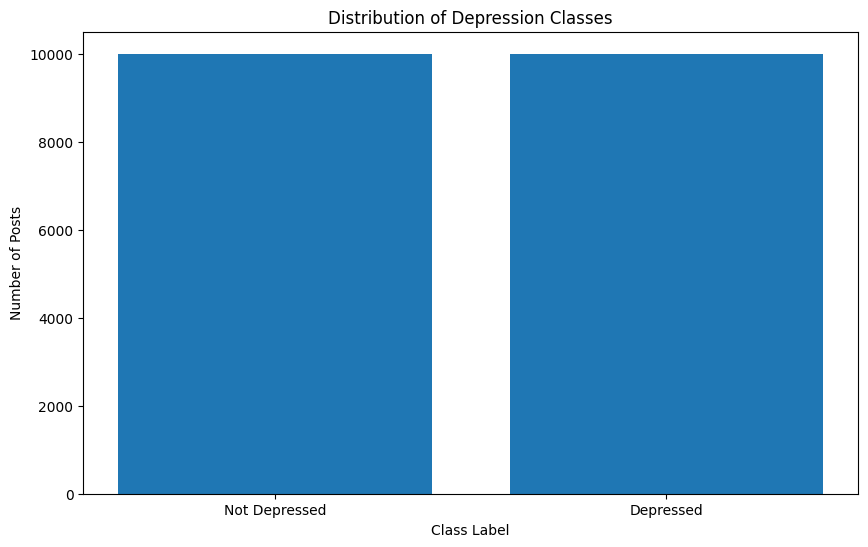

In [9]:
# Display the distribution of labels
label_counts = data["label"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values)

# Modify x-axis ticks and labels
plt.xticks(
    ticks=[0, 1],
    labels=["Not Depressed", "Depressed"]
)

plt.xlabel("Class Label")
plt.ylabel("Number of Posts")
plt.title("Distribution of Depression Classes")

plt.show()

In [10]:
# Task 3 - Text Preprocessing

# Remove unnecessary attributes and keep the relevent ones
df = data[["post_text", "label"]].copy()

print("attributes kept:", df.columns.tolist())
print("New shape:", df.shape)
df.head(10)


attributes kept: ['post_text', 'label']
New shape: (20000, 2)


,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,Itâs hard to say whether packing lists are m...,1
5,Making packing lists is my new hobby... #movin...,1
6,At what point does keeping stuff for nostalgic...,1
7,Currently in the finding-boxes-of-random-shit ...,1
8,"Can't be bothered to cook, take away on the wa...",1
9,RT @itventsnews: ITV releases promo video for ...,1


In [11]:
# Remove records with missing text or labels
df = df.dropna(subset=["post_text", "label"]).copy()

print("Shape after dropna:", df.shape)
df.head(10)

Shape after dropna: (20000, 2)


,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,Itâs hard to say whether packing lists are m...,1
5,Making packing lists is my new hobby... #movin...,1
6,At what point does keeping stuff for nostalgic...,1
7,Currently in the finding-boxes-of-random-shit ...,1
8,"Can't be bothered to cook, take away on the wa...",1
9,RT @itventsnews: ITV releases promo video for ...,1


In [12]:
# Remove stop words
def clean_and_remove_stopwords(text: str) -> str:
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"@\w+", "", text)            # remove mentions
    text = re.sub(r"#\w+", "", text)            # remove hashtags
    text = re.sub(r"\d+", "", text)             # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # punctuation
    text = re.sub(r"\s+", " ", text).strip()

    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

# Apply remove stopwords function
df["cleaned_text"] = df["post_text"].apply(clean_and_remove_stopwords)

# Show before vs after
i = df.index[0]
print("original:", df.loc[i, "post_text"])
print("cleaned:", df.loc[i, "cleaned_text"])

original: It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.
cleaned: years since diagnosed today im taking moment reflect far ive come since


In [13]:
# Tokenization
df["tokens"] = df["cleaned_text"].apply(word_tokenize)

# Show before and after
i = df.index[0]
print("before:", df.loc[i, "cleaned_text"])
print("after:", df.loc[i, "tokens"])

before: years since diagnosed today im taking moment reflect far ive come since
after: ['years', 'since', 'diagnosed', 'today', 'im', 'taking', 'moment', 'reflect', 'far', 'ive', 'come', 'since']


In [14]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df["lemmatized_tokens"] = df["tokens"].apply(lemmatize_tokens)

print("before:", df.loc[i, "tokens"])
print("after :", df.loc[i, "lemmatized_tokens"])

before: ['years', 'since', 'diagnosed', 'today', 'im', 'taking', 'moment', 'reflect', 'far', 'ive', 'come', 'since']
after : ['year', 'since', 'diagnosed', 'today', 'im', 'taking', 'moment', 'reflect', 'far', 'ive', 'come', 'since']


In [15]:
# Join the tokens together to apply TF-IDF Feature Extraction
df["final_text"] = df["lemmatized_tokens"].apply(lambda x: " ".join(x))

print(df.loc[i, "final_text"])

year since diagnosed today im taking moment reflect far ive come since


In [16]:
# TF-IDF Feature Extraction + Top terms

tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df["final_text"])

print("\nTF-IDF matrix shape:", X_tfidf.shape)

feature_names = tfidf.get_feature_names_out()
avg_scores = X_tfidf.mean(axis=0).A1
top_idx = np.argsort(avg_scores)[::-1][:15]

top_terms_df = pd.DataFrame(
    [(feature_names[i], avg_scores[i]) for i in top_idx],
    columns=["term", "avg_tfidf_score"]
)

print("Top 15 TF-IDF Terms")
print(top_terms_df)


TF-IDF matrix shape: (20000, 2000)
Top 15 TF-IDF Terms
          term  avg_tfidf_score
0           rt         0.042032
1           im         0.016594
2         like         0.012872
3   depression         0.011660
4         dont         0.010709
5         love         0.010620
6          one         0.010356
7          get         0.009728
8         know         0.009607
9       people         0.008057
10        time         0.007657
11          go         0.007533
12        good         0.007407
13         say         0.007097
14         day         0.007034


In [17]:
# Save the cleaned dataset
cleaned_df = df[["final_text", "label"]]

# Export to CSV
cleaned_df.to_csv("Mental-Health-Twitter_Cleaned.csv", index=False)

In [18]:
# Obtain the first rows of the cleaned dataset
cleaned_df.head(10)

,final_text,label
0,year since diagnosed today im taking moment re...,1
1,sunday need break im planning spend little tim...,1
2,awake tired need sleep brain idea,1
3,rt bear make perfect gift great beginner get s...,1
4,itâs hard say whether packing list making li...,1
5,making packing list new hobby,1
6,point keeping stuff nostalgic reason cross lin...,1
7,currently findingboxesofrandomshit packing pha...,1
8,cant bothered cook take away way ððð¼,1
9,rt itv release promo video final series downto...,1


In [19]:
# Task 4 - Text Representation

# Convert the final cleaned text into a list format required by text representation methods
texts = cleaned_df["final_text"].astype(str).tolist()

In [20]:
# Bag of Words
bow_vectorizer = CountVectorizer(
    max_features=5000,
    min_df=2
)

X_bow = bow_vectorizer.fit_transform(texts)

print("BoW matrix shape:", X_bow.shape)
print("Example vocabulary size:", len(bow_vectorizer.get_feature_names_out()))

# Show top 20 most frequent words (optional)
word_counts = np.asarray(X_bow.sum(axis=0)).ravel()
vocab = bow_vectorizer.get_feature_names_out()
top_idx = word_counts.argsort()[-20:][::-1]

top_bow = pd.DataFrame({"word": vocab[top_idx], "count": word_counts[top_idx]})
top_bow

BoW matrix shape: (20000, 5000)
Example vocabulary size: 5000


,word,count
0,rt,3837
1,im,1279
2,like,995
3,depression,828
4,dont,810
5,one,742
6,get,681
7,love,617
8,know,608
9,people,573


In [21]:
#  N-grams (2 grams)
ngram_vectorizer = CountVectorizer(
    ngram_range=(2, 2),  # bigrams
    max_features=8000,
    min_df=2
)

X_ngrams = ngram_vectorizer.fit_transform(texts)

print("N-grams matrix shape:", X_ngrams.shape)

# Show top 20 most frequent n-grams
ngram_counts = np.asarray(X_ngrams.sum(axis=0)).ravel()
ngrams_vocab = ngram_vectorizer.get_feature_names_out()
top_idx = ngram_counts.argsort()[-20:][::-1]

top_ngrams = pd.DataFrame({"ngram": ngrams_vocab[top_idx], "count": ngram_counts[top_idx]})
top_ngrams

N-grams matrix shape: (20000, 8000)


,ngram,count
0,depression treatment,267
1,following twitter,204
2,twitter thank,204
3,overcome depression,198
4,gon na,197
5,say hello,172
6,wan na,135
7,wearepayting foryong,104
8,thanks follow,102
9,hello anytime,100


In [22]:
# POS Tagging (spaCy)
nlp = spacy.load("en_core_web_sm")

sample_text = texts[0]
doc = nlp(sample_text)

pos_tags = [(token.text, token.pos_) for token in doc]
pos_tags[:25]

[('year', 'NOUN'),
 ('since', 'SCONJ'),
 ('diagnosed', 'VERB'),
 ('today', 'NOUN'),
 ('i', 'PRON'),
 ('m', 'AUX'),
 ('taking', 'VERB'),
 ('moment', 'NOUN'),
 ('reflect', 'VERB'),
 ('far', 'ADV'),
 ('i', 'PRON'),
 ('ve', 'AUX'),
 ('come', 'VERB'),
 ('since', 'SCONJ')]

In [23]:
# Task 5 - Text Classification & Task 6 - Evaluation
# Train/Test Split
X = cleaned_df["final_text"].astype(str)
y = cleaned_df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 16000
Test size: 4000


In [24]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Train shape:", X_train_tfidf.shape)
print("TF-IDF Test shape:", X_test_tfidf.shape)


TF-IDF Train shape: (16000, 5000)
TF-IDF Test shape: (4000, 5000)


In [25]:
# Model 1 — Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.744
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      2000
           1       0.73      0.78      0.75      2000

    accuracy                           0.74      4000
   macro avg       0.75      0.74      0.74      4000
weighted avg       0.75      0.74      0.74      4000



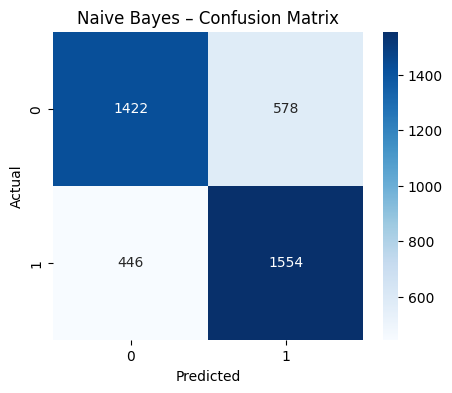

In [26]:
# Naive Bayes - Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
# Model 2 — Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.74425
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2000
           1       0.75      0.74      0.74      2000

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



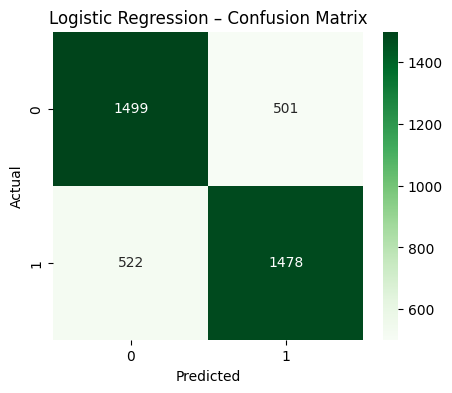

In [28]:
# Logistic Regression - Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
# Model 3 - Support Vector Machine (SVM)

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.74625
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2000
           1       0.75      0.75      0.75      2000

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



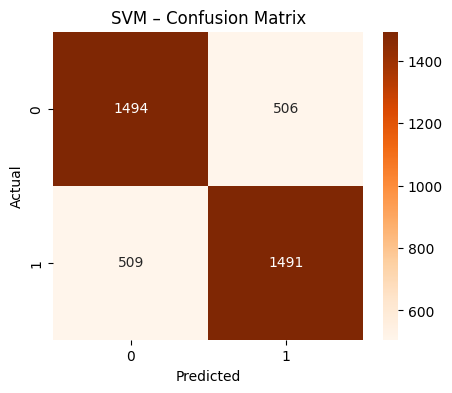

In [30]:
# Support Vector Machine (SVM) - Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("SVM – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()